In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing the Packages**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

#**Loading the Dataset**


In [ ]:
# Load the dataset
print("Loading the dataset...")
data = pd.read_csv('/content/drive/MyDrive/Customer Churn Analysis/tel_churn.csv')

Loading the dataset...


In [ ]:
data

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29,29,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56,1889,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53,108,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42,1840,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70,151,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,84,1990,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,7039,0,103,7362,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,7040,0,29,346,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,7041,1,74,306,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84,1990,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7028,0,103,7362,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7029,0,29,346,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74,306,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


#**Computing the correlation matrix and selecting features**

In [ ]:
print("Computing the correlation matrix and selecting features...")
correlation_matrix = data.corr()

Computing the correlation matrix and selecting features...


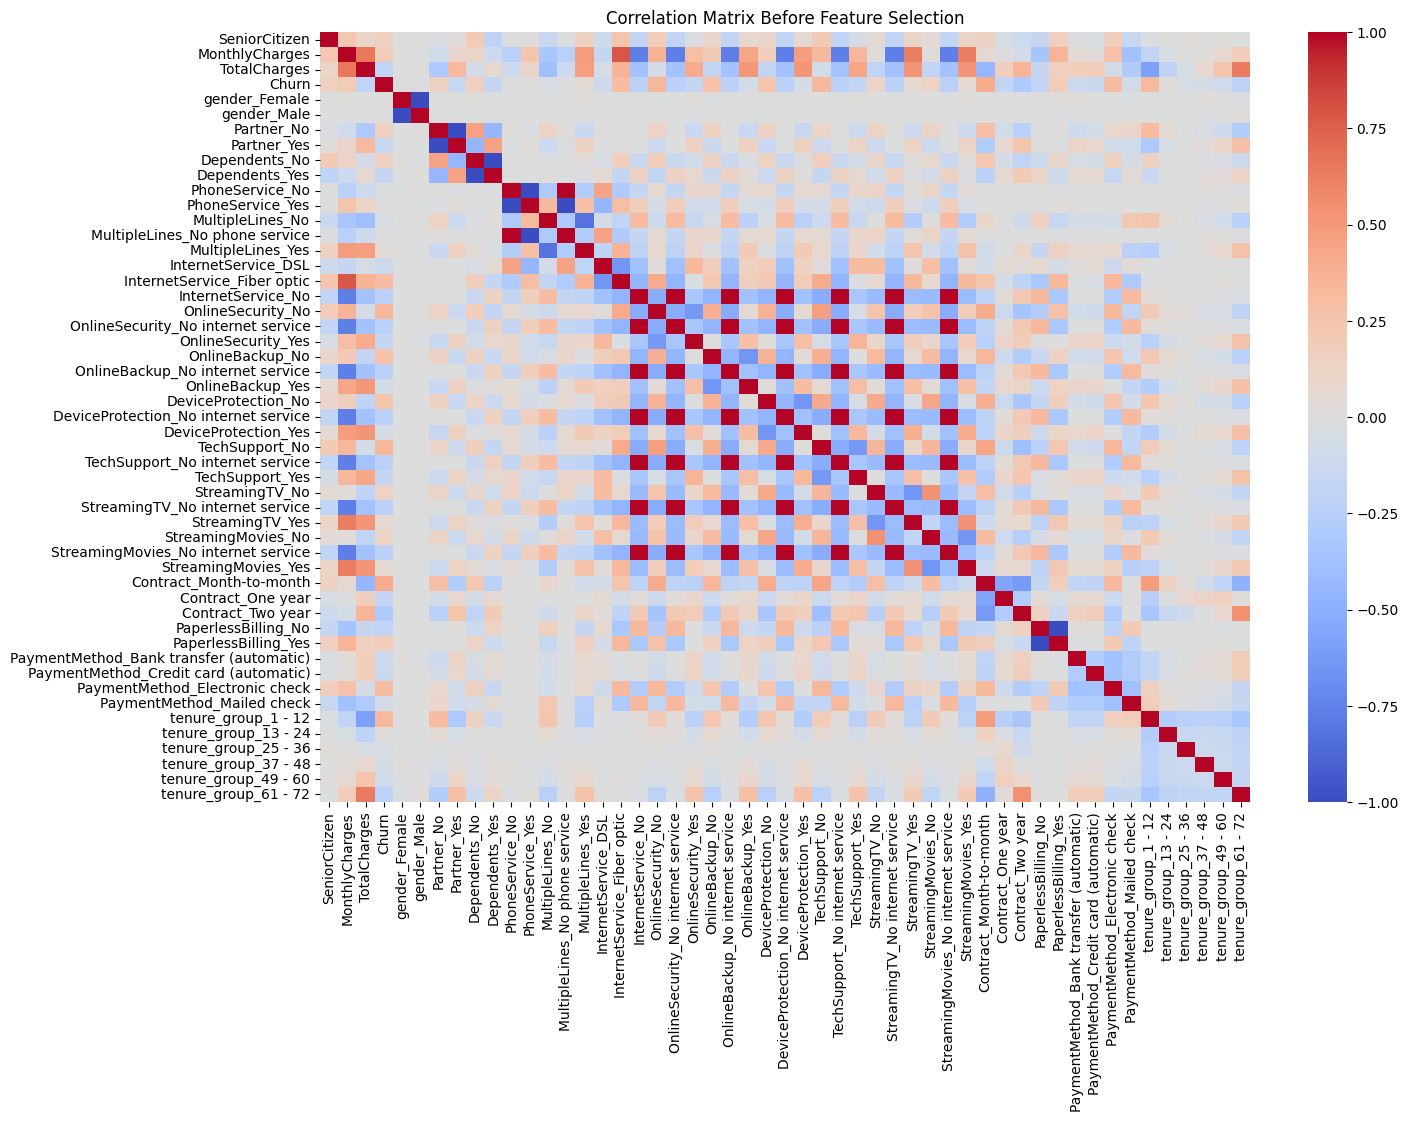

In [ ]:
# Compute the initial correlation matrix
initial_correlation_matrix = data.corr()

# Plot the correlation matrix before feature selection
plt.figure(figsize=(15, 10))
sns.heatmap(initial_correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Before Feature Selection')
plt.show()

In [ ]:
print("Computing the correlation matrix and selecting features...")
correlation_matrix = data.corr()

# Calculate the absolute value of the correlation matrix and use it to find highly correlated features
abs_correlation_matrix = correlation_matrix.abs()

# Select upper triangle of correlation matrix
upper_triangle = abs_correlation_matrix.where(np.triu(np.ones(abs_correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
corr_threshold = 0.7
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > corr_threshold)]

# Drop highly correlated features
data_reduced = data.drop(columns=to_drop)

print("Features selected after removing highly correlated ones:\n", data_reduced.columns)

Computing the correlation matrix and selecting features...
Features selected after removing highly correlated ones:
 Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No',
       'MultipleLines_No', 'InternetService_DSL', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_1 - 12', 'tenure_group_13 - 24', 'tenure_group_25 - 36',
       'tenure_group_37 - 48', 'tenure_group_49 - 60', 'tenure_group_6

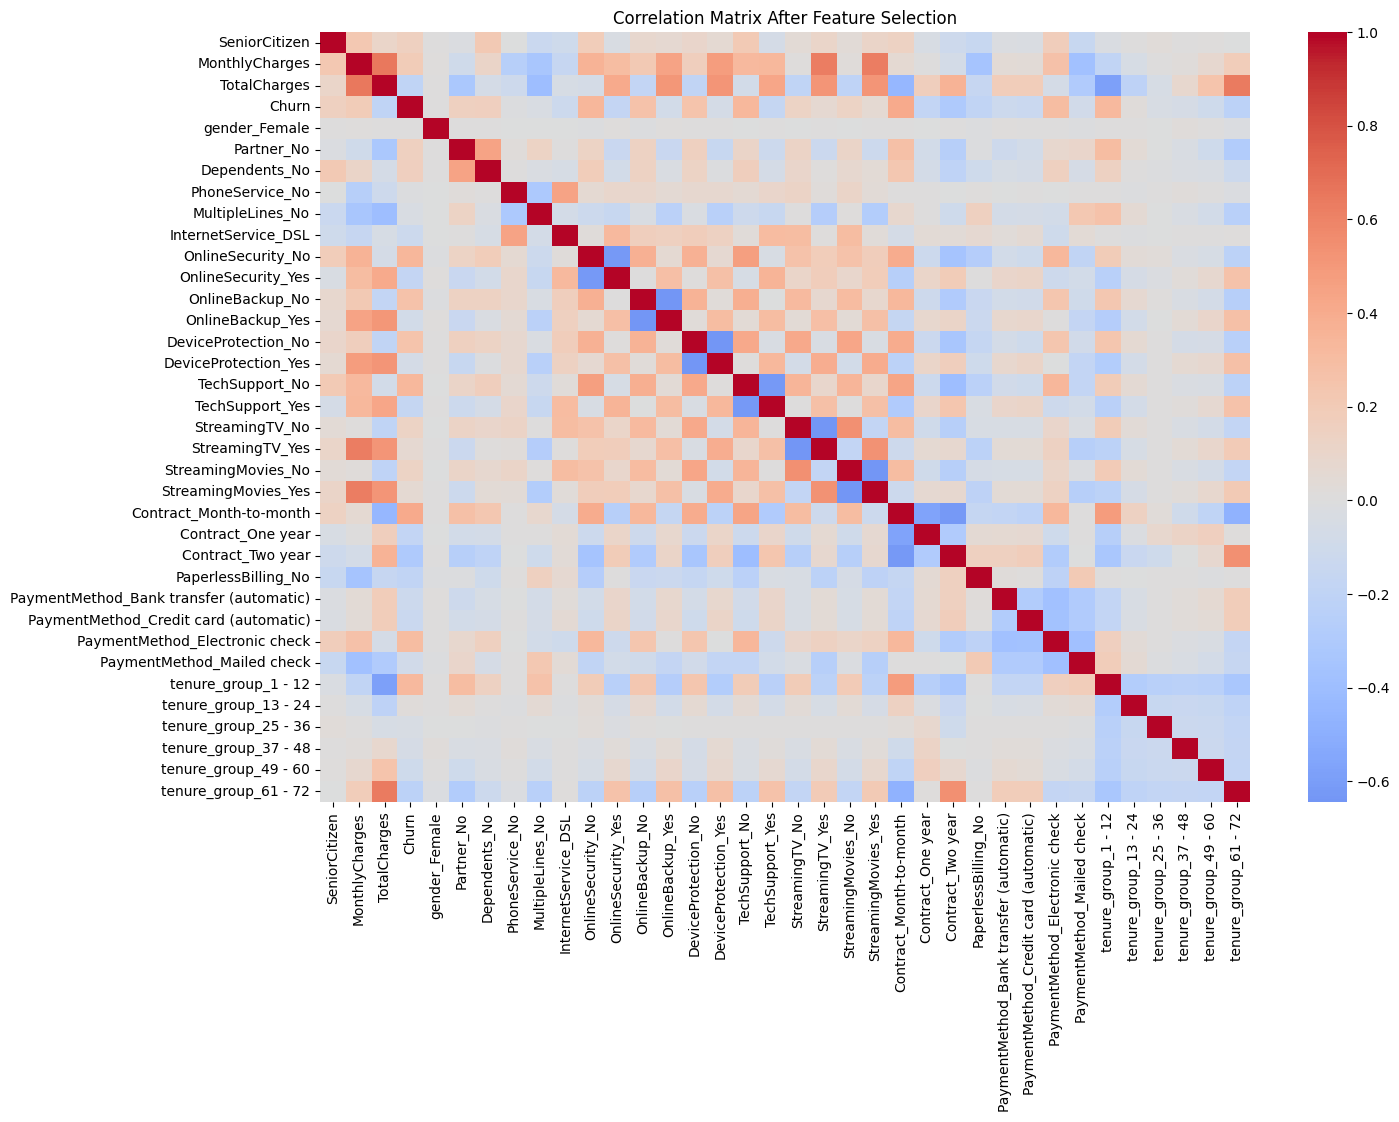

In [ ]:
# Compute the correlation matrix after feature selection
reduced_correlation_matrix = data_reduced.corr()

# Plot the correlation matrix after feature selection
plt.figure(figsize=(15, 10))
sns.heatmap(reduced_correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix After Feature Selection')
plt.show()

In [56]:
print("Computing correlation with target variable 'Churn'...")

# Calculate correlation with the target variable 'Churn'
correlation_with_target = data_reduced.corr()['Churn'].abs()

# Define the correlation threshold
correlation_threshold = 0.15

# Select features with correlation above the threshold
selected_features = correlation_with_target[correlation_with_target > correlation_threshold].index

# Filter the dataset to keep only selected features
data_final = data_reduced[selected_features]

print("Features with correlation greater than 0.15 with 'Churn':\n", selected_features)
print("Data after removing low-correlation features:\n")
data_final

Computing correlation with target variable 'Churn'...
Features with correlation greater than 0.15 with 'Churn':
 Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Dependents_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No',
       'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No',
       'PaymentMethod_Electronic check', 'tenure_group_1 - 12',
       'tenure_group_61 - 72'],
      dtype='object')
Data after removing low-correlation features:



,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Dependents_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_No,TechSupport_No,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaymentMethod_Electronic check,tenure_group_1 - 12,tenure_group_61 - 72
0,0,29,29,0,1,1,0,0,1,1,0,1,0,0,0,1,1,0
1,0,56,1889,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0
2,0,53,108,1,1,0,1,0,1,1,0,1,0,0,0,0,1,0
3,0,42,1840,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0
4,0,70,151,1,1,1,0,1,1,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84,1990,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
7028,0,103,7362,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
7029,0,29,346,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0
7030,1,74,306,1,1,1,0,1,1,1,0,1,0,0,0,0,1,0


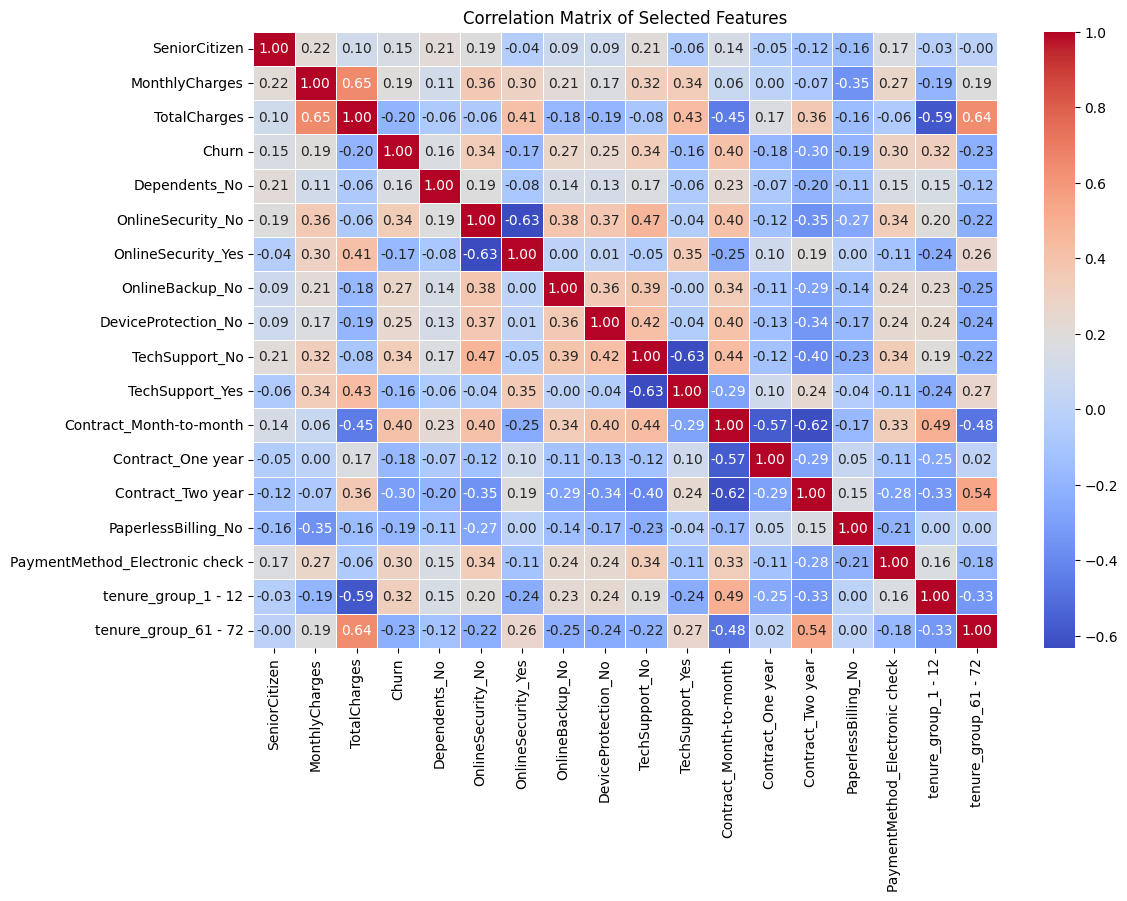

In [ ]:
# Plotting the heatmap of the correlation matrix of selected features
plt.figure(figsize=(12, 8))
correlation_matrix_final = data_final.corr()
sns.heatmap(correlation_matrix_final, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

#**Data Splitting and Feature Scaling**

In [ ]:
# Splitting the data into features and target
print("Splitting the data into training and testing sets...")
X = data_final.drop(columns=['Churn'])
y = data_final['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Splitting the data into training and testing sets...
Scaling features...


In [ ]:
X_train_scaled

array([[-0.4369239 , -0.20361713, -0.76748347, ..., -0.71758461,
         1.47773471, -0.50653125],
       [-0.4369239 , -0.10401761, -0.3067711 , ...,  1.39356389,
        -0.67671145, -0.50653125],
       [-0.4369239 ,  0.16158109, -0.9085269 , ...,  1.39356389,
         1.47773471, -0.50653125],
       ...,
       [-0.4369239 ,  0.55997914, -0.65915859, ...,  1.39356389,
         1.47773471, -0.50653125],
       [-0.4369239 , -1.4984108 , -0.5685194 , ..., -0.71758461,
        -0.67671145, -0.50653125],
       [ 2.2887281 ,  0.29438044, -0.3589439 , ...,  1.39356389,
        -0.67671145, -0.50653125]])

In [ ]:
X_test_scaled

array([[ 2.2887281 , -1.29921177, -0.34214249, ..., -0.71758461,
        -0.67671145,  1.97421185],
       [-0.4369239 , -1.33241161, -0.80020201, ..., -0.71758461,
        -0.67671145, -0.50653125],
       [-0.4369239 ,  1.25717573, -0.40492671, ..., -0.71758461,
        -0.67671145, -0.50653125],
       ...,
       [-0.4369239 , -1.46521096, -0.58885795, ..., -0.71758461,
        -0.67671145, -0.50653125],
       [-0.4369239 , -0.30321664, -0.89128334, ..., -0.71758461,
         1.47773471, -0.50653125],
       [ 2.2887281 ,  1.25717573,  1.95125012, ...,  1.39356389,
        -0.67671145,  1.97421185]])

# **Training and Evaluating Models**

##Logistic Regression

In [ ]:
print("Training Logistic Regression...")
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_reg.predict(X_test_scaled)

Training Logistic Regression...


##Decision Tree


In [ ]:
print("Training Decision Tree...")
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

Training Decision Tree...


##Random Forest

In [ ]:
print("Training Random Forest...")
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

Training Random Forest...


##Gradient Boosting Machine (GBM)

In [ ]:
print("Training Gradient Boosting Machine...")
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

Training Gradient Boosting Machine...


##XGBoost

In [ ]:
# XGBoost
print("Training XGBoost...")
xgboost = XGBClassifier(random_state=42, eval_metric='logloss', n_estimators=50)
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)

Training XGBoost...


##Support Vector Machine (SVM)

In [ ]:
print("Training Support Vector Machine...")
svm = SVC(random_state=42, class_weight='balanced')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

Training Support Vector Machine...


#**Storing and Displaying Model Results**

In [ ]:
# Storing the results in a dictionary
model_results = {
    'Logistic Regression': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_logistic),
        'f1_score': f1_score(y_test, y_pred_logistic),
        'roc_auc': roc_auc_score(y_test, logistic_reg.predict_proba(X_test_scaled)[:, 1]),
        'roc_curve': roc_curve(y_test, logistic_reg.predict_proba(X_test_scaled)[:, 1])
    },
    'Decision Tree': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_tree),
        'f1_score': f1_score(y_test, y_pred_tree),
        'roc_auc': roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]),
        'roc_curve': roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
    },
    'Random Forest': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_forest),
        'f1_score': f1_score(y_test, y_pred_forest),
        'roc_auc': roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]),
        'roc_curve': roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
    },
    'XGBoost': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_xgb),
        'f1_score': f1_score(y_test, y_pred_xgb),
        'roc_auc': roc_auc_score(y_test, xgboost.predict_proba(X_test)[:, 1]),
        'roc_curve': roc_curve(y_test, xgboost.predict_proba(X_test)[:, 1])
    },
    'Support Vector Machine': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_svm),
        'f1_score': f1_score(y_test, y_pred_svm),
        'roc_auc': roc_auc_score(y_test, svm.decision_function(X_test_scaled)),
        'roc_curve': roc_curve(y_test, svm.decision_function(X_test_scaled))
    },
    'Gradient Boosting Machine': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_gbm),
        'f1_score': f1_score(y_test,y_pred_gbm),
        'roc_auc': roc_auc_score(y_test, gbm.predict_proba(X_test)[:, 1]),
        'roc_curve': roc_curve(y_test, gbm.predict_proba(X_test)[:, 1])
    }
}

print("Model evaluation results stored.")


Model evaluation results stored.


#**Visualizing Confusion Matrices and Comparing Models**

Plotting confusion matrices...


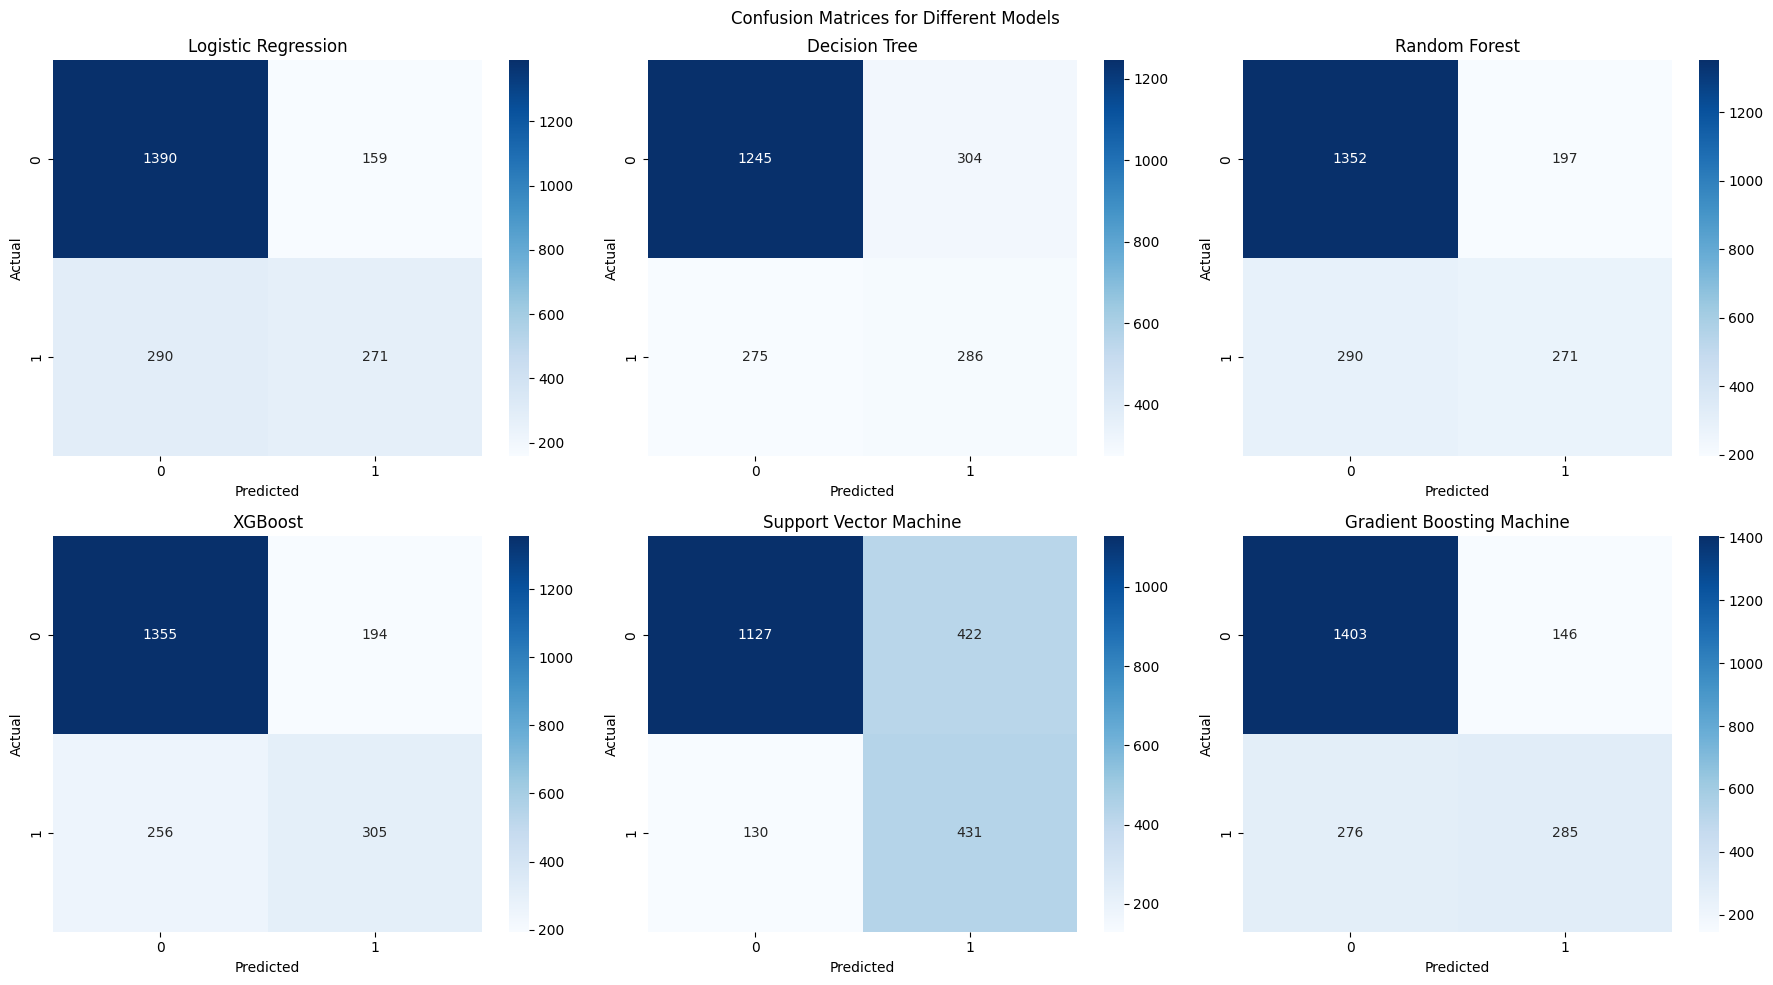

Creating comparison table...
Model Comparison:
                           F1 Score   ROC AUC  \
Logistic Regression        0.546922  0.829807   
Decision Tree              0.496959  0.663207   
Random Forest              0.526725  0.806831   
XGBoost                    0.575472  0.820882   
Support Vector Machine     0.609618  0.803735   
Gradient Boosting Machine  0.574597  0.837096   

                                                                   roc_curve  \
Logistic Regression        ([0.0, 0.0, 0.0, 0.0006455777921239509, 0.0006...   
Decision Tree              ([0.0, 0.19173660426081343, 0.1923821820529374...   
Random Forest              ([0.0, 0.0012911555842479018, 0.00129115558424...   
XGBoost                    ([0.0, 0.0006455777921239509, 0.00064557779212...   
Support Vector Machine     ([0.0, 0.0006455777921239509, 0.00129115558424...   
Gradient Boosting Machine  ([0.0, 0.0, 0.0, 0.0006455777921239509, 0.0006...   

                                              Co

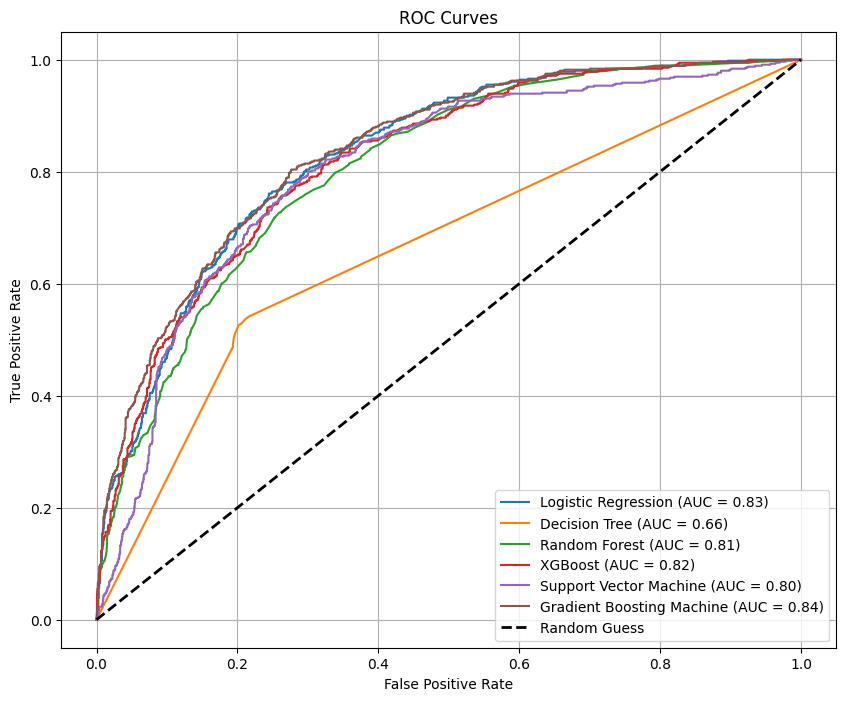

In [ ]:
# Plotting the confusion matrices
print("Plotting confusion matrices...")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Different Models')

for ax, (model_name, metrics) in zip(axes.ravel(), model_results.items()):
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Creating a comparison table
print("Creating comparison table...")
comparison_table = pd.DataFrame(model_results).T

# Formatting confusion matrix for readability
comparison_table['Confusion Matrix'] = comparison_table['confusion_matrix'].apply(
    lambda cm: f"TP: {cm[1,1]}, FP: {cm[0,1]}, FN: {cm[1,0]}, TN: {cm[0,0]}"
)

# Dropping the actual confusion matrix as it's now summarized
comparison_table = comparison_table.drop(columns=['confusion_matrix'])

# Renaming columns for clarity
comparison_table = comparison_table.rename(columns={'f1_score': 'F1 Score', 'roc_auc': 'ROC AUC'})

# Displaying the comparison table
print("Model Comparison:")
print(comparison_table)

# Plotting ROC curves
print("Plotting ROC curves...")
plt.figure(figsize=(10, 8))
for model_name, metrics in model_results.items():
    fpr, tpr, _ = metrics['roc_curve']
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#**Hyperparameter Tuning**

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


##Suport Vector Machine (SVM)

In [ ]:
import optuna
from sklearn.svm import SVC


# Function to optimize SVM hyperparameters
def svm_objective(trial):
    print("Starting a new trial for SVM hyperparameter tuning...")
    # Define the hyperparameter search space
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    # Create and train the SVM model
    model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42, probability=True)
    model.fit(X_train_scaled, y_train)

    # Predict probabilities and evaluate
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = model.predict(X_test_scaled)

    # Calculate ROC AUC and F1 score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)

    print(f"Trial complete with C={C}, kernel={kernel}, gamma={gamma}, ROC AUC={roc_auc}, F1 Score={f1}")

    # Returning ROC AUC as the objective metric
    return roc_auc

# Create a study and optimize the objective function
print("Creating a study for SVM...")
svm_study = optuna.create_study(direction='maximize')
svm_study.optimize(svm_objective, n_trials=150)

# Output best parameters
best_svm_params = svm_study.best_params
print("Best parameters for SVM:", best_svm_params)
print(f"Best trial ROC AUC: {svm_study.best_value}")


[I 2024-07-30 17:37:17,947] A new study created in memory with name: no-name-777f7b26-ff8e-40ea-9e30-721f54b0342d


Creating a study for SVM...
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:37:29,745] Trial 0 finished with value: 0.6560566359297989 and parameters: {'C': 13.439612583382527, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.6560566359297989.


Trial complete with C=13.439612583382527, kernel=sigmoid, gamma=scale, ROC AUC=0.6560566359297989, F1 Score=0.4947368421052632
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:37:39,255] Trial 1 finished with value: 0.8225685250331132 and parameters: {'C': 0.8263465242519556, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 1 with value: 0.8225685250331132.


Trial complete with C=0.8263465242519556, kernel=linear, gamma=auto, ROC AUC=0.8225685250331132, F1 Score=0.533470648815654
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:37:45,605] Trial 2 finished with value: 0.8149326401139716 and parameters: {'C': 0.01695283653851882, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 1 with value: 0.8225685250331132.


Trial complete with C=0.01695283653851882, kernel=rbf, gamma=auto, ROC AUC=0.8149326401139716, F1 Score=0.46565774155995343
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:38:04,693] Trial 3 finished with value: 0.8226387215488344 and parameters: {'C': 19.778296062906943, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 3 with value: 0.8226387215488344.


Trial complete with C=19.778296062906943, kernel=linear, gamma=scale, ROC AUC=0.8226387215488344, F1 Score=0.533470648815654
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:38:12,295] Trial 4 finished with value: 0.774984493474601 and parameters: {'C': 5.053086539773013, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 3 with value: 0.8226387215488344.


Trial complete with C=5.053086539773013, kernel=rbf, gamma=auto, ROC AUC=0.774984493474601, F1 Score=0.5580057526366251
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:38:23,149] Trial 5 finished with value: 0.8131581642575453 and parameters: {'C': 1.008152734056947e-05, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 3 with value: 0.8226387215488344.


Trial complete with C=1.008152734056947e-05, kernel=poly, gamma=scale, ROC AUC=0.8131581642575453, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:38:41,126] Trial 6 finished with value: 0.8226134047726725 and parameters: {'C': 2.7526580062714427, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 3 with value: 0.8226387215488344.


Trial complete with C=2.7526580062714427, kernel=linear, gamma=scale, ROC AUC=0.8226134047726725, F1 Score=0.533470648815654
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:38:47,722] Trial 7 finished with value: 0.8128140862542566 and parameters: {'C': 0.00023799065540792294, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 3 with value: 0.8226387215488344.


Trial complete with C=0.00023799065540792294, kernel=rbf, gamma=auto, ROC AUC=0.8128140862542566, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:38:52,398] Trial 8 finished with value: 0.658459428140057 and parameters: {'C': 3.5900448016816386, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 3 with value: 0.8226387215488344.


Trial complete with C=3.5900448016816386, kernel=sigmoid, gamma=scale, ROC AUC=0.658459428140057, F1 Score=0.49371633752244165
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:38:59,366] Trial 9 finished with value: 0.7771778469002485 and parameters: {'C': 12.546287749969698, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 3 with value: 0.8226387215488344.


Trial complete with C=12.546287749969698, kernel=poly, gamma=scale, ROC AUC=0.7771778469002485, F1 Score=0.5637209302325582
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:05,215] Trial 10 finished with value: 0.8232670379026663 and parameters: {'C': 0.058069033574817894, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 10 with value: 0.8232670379026663.


Trial complete with C=0.058069033574817894, kernel=linear, gamma=scale, ROC AUC=0.8232670379026663, F1 Score=0.5196687370600414
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:07,986] Trial 11 finished with value: 0.8229954579402041 and parameters: {'C': 0.12688142736051164, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 10 with value: 0.8232670379026663.


Trial complete with C=0.12688142736051164, kernel=linear, gamma=scale, ROC AUC=0.8229954579402041, F1 Score=0.5227272727272727
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:10,580] Trial 12 finished with value: 0.8235708392166069 and parameters: {'C': 0.04345902320546901, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 12 with value: 0.8235708392166069.


Trial complete with C=0.04345902320546901, kernel=linear, gamma=scale, ROC AUC=0.8235708392166069, F1 Score=0.5257731958762887
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:13,628] Trial 13 finished with value: 0.8243441516520923 and parameters: {'C': 0.010574664951353363, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 13 with value: 0.8243441516520923.


Trial complete with C=0.010574664951353363, kernel=linear, gamma=scale, ROC AUC=0.8243441516520923, F1 Score=0.5357873210633948
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:17,891] Trial 14 finished with value: 0.8246962849932508 and parameters: {'C': 0.002618520987507824, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 14 with value: 0.8246962849932508.


Trial complete with C=0.002618520987507824, kernel=linear, gamma=scale, ROC AUC=0.8246962849932508, F1 Score=0.5314401622718053
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:20,412] Trial 15 finished with value: 0.8246669405481543 and parameters: {'C': 0.003050007959565542, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 14 with value: 0.8246962849932508.


Trial complete with C=0.003050007959565542, kernel=linear, gamma=scale, ROC AUC=0.8246669405481543, F1 Score=0.5314401622718053
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:23,091] Trial 16 finished with value: 0.8247992782417267 and parameters: {'C': 0.0006023972926405261, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 16 with value: 0.8247992782417267.


Trial complete with C=0.0006023972926405261, kernel=linear, gamma=scale, ROC AUC=0.8247992782417267, F1 Score=0.23889739663093415
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:30,091] Trial 17 finished with value: 0.8232819978158527 and parameters: {'C': 0.000601720159906719, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 16 with value: 0.8247992782417267.


Trial complete with C=0.000601720159906719, kernel=sigmoid, gamma=scale, ROC AUC=0.8232819978158527, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:33,668] Trial 18 finished with value: 0.813754834641175 and parameters: {'C': 4.678703847355406e-05, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 16 with value: 0.8247992782417267.


Trial complete with C=4.678703847355406e-05, kernel=poly, gamma=auto, ROC AUC=0.813754834641175, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:36,298] Trial 19 finished with value: 0.8250489937156857 and parameters: {'C': 0.001728449790758561, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.001728449790758561, kernel=linear, gamma=scale, ROC AUC=0.8250489937156857, F1 Score=0.5344295991778005
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:38,917] Trial 20 finished with value: 0.8248619948008548 and parameters: {'C': 0.0001219244882247888, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.0001219244882247888, kernel=linear, gamma=scale, ROC AUC=0.8248619948008548, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:41,482] Trial 21 finished with value: 0.8248044566732144 and parameters: {'C': 0.0003216333451060014, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.0003216333451060014, kernel=linear, gamma=scale, ROC AUC=0.8248044566732144, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:46,165] Trial 22 finished with value: 0.8248245950178885 and parameters: {'C': 0.00016021457557307964, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.00016021457557307964, kernel=linear, gamma=scale, ROC AUC=0.8248245950178885, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:48,918] Trial 23 finished with value: 0.8249172314033895 and parameters: {'C': 6.107165595196654e-05, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=6.107165595196654e-05, kernel=linear, gamma=scale, ROC AUC=0.8249172314033895, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:51,510] Trial 24 finished with value: 0.8247848937098169 and parameters: {'C': 3.495352933437475e-05, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=3.495352933437475e-05, kernel=linear, gamma=scale, ROC AUC=0.8247848937098169, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:39:54,091] Trial 25 finished with value: 0.8242233215840478 and parameters: {'C': 0.0033935373297531977, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.0033935373297531977, kernel=linear, gamma=scale, ROC AUC=0.8242233215840478, F1 Score=0.5289928789420142
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:00,340] Trial 26 finished with value: 0.8137582869288335 and parameters: {'C': 4.8061419012481965e-05, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=4.8061419012481965e-05, kernel=poly, gamma=auto, ROC AUC=0.8137582869288335, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:06,139] Trial 27 finished with value: 0.8224718609786775 and parameters: {'C': 1.0709478798850828e-05, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=1.0709478798850828e-05, kernel=sigmoid, gamma=scale, ROC AUC=0.8224718609786775, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:19,023] Trial 28 finished with value: 0.8147479427242462 and parameters: {'C': 0.0015115752711606064, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.0015115752711606064, kernel=rbf, gamma=scale, ROC AUC=0.8147479427242462, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:32,567] Trial 29 finished with value: 0.8233844156830524 and parameters: {'C': 0.00010083951304998761, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.00010083951304998761, kernel=sigmoid, gamma=scale, ROC AUC=0.8233844156830524, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:37,850] Trial 30 finished with value: 0.8247889213787516 and parameters: {'C': 0.0008125562967590253, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.0008125562967590253, kernel=linear, gamma=scale, ROC AUC=0.8247889213787516, F1 Score=0.44815256257449343
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:40,513] Trial 31 finished with value: 0.8247946751915157 and parameters: {'C': 0.00013420745592090139, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.00013420745592090139, kernel=linear, gamma=scale, ROC AUC=0.8247946751915157, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:44,435] Trial 32 finished with value: 0.8248320749744819 and parameters: {'C': 0.00010172457689755828, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.00010172457689755828, kernel=linear, gamma=scale, ROC AUC=0.8248320749744819, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:48,033] Trial 33 finished with value: 0.8248424318374571 and parameters: {'C': 2.4819897585533972e-05, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=2.4819897585533972e-05, kernel=linear, gamma=scale, ROC AUC=0.8248424318374571, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:50,656] Trial 34 finished with value: 0.8246922573243161 and parameters: {'C': 1.8972827533430714e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=1.8972827533430714e-05, kernel=linear, gamma=auto, ROC AUC=0.8246922573243161, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:53,071] Trial 35 finished with value: 0.8243706191908069 and parameters: {'C': 0.008814290444928251, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.008814290444928251, kernel=linear, gamma=scale, ROC AUC=0.8243706191908069, F1 Score=0.5330620549338759
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:40:57,984] Trial 36 finished with value: 0.8108848328344777 and parameters: {'C': 3.0015201487160344e-05, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=3.0015201487160344e-05, kernel=rbf, gamma=auto, ROC AUC=0.8108848328344777, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:02,138] Trial 37 finished with value: 0.8247843183285404 and parameters: {'C': 0.00041183073017357006, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.00041183073017357006, kernel=linear, gamma=scale, ROC AUC=0.8247843183285404, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:04,741] Trial 38 finished with value: 0.8247440416391922 and parameters: {'C': 5.529025752273285e-05, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=5.529025752273285e-05, kernel=linear, gamma=scale, ROC AUC=0.8247440416391922, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:09,137] Trial 39 finished with value: 0.782490917606552 and parameters: {'C': 0.2823321492461248, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.2823321492461248, kernel=rbf, gamma=auto, ROC AUC=0.782490917606552, F1 Score=0.5352400408580184
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:12,772] Trial 40 finished with value: 0.8131593150200981 and parameters: {'C': 1.5894793752100395e-05, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=1.5894793752100395e-05, kernel=poly, gamma=scale, ROC AUC=0.8131593150200981, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:17,017] Trial 41 finished with value: 0.8248424318374572 and parameters: {'C': 8.827903106123728e-05, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=8.827903106123728e-05, kernel=linear, gamma=scale, ROC AUC=0.8248424318374572, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:19,631] Trial 42 finished with value: 0.824936218985511 and parameters: {'C': 0.001285002417784818, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 19 with value: 0.8250489937156857.


Trial complete with C=0.001285002417784818, kernel=linear, gamma=scale, ROC AUC=0.824936218985511, F1 Score=0.53125
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:22,282] Trial 43 finished with value: 0.8250725843480182 and parameters: {'C': 0.0016256178945156833, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 43 with value: 0.8250725843480182.


Trial complete with C=0.0016256178945156833, kernel=linear, gamma=scale, ROC AUC=0.8250725843480182, F1 Score=0.5336091003102379
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:25,033] Trial 44 finished with value: 0.8248044566732144 and parameters: {'C': 0.001133094571763359, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 43 with value: 0.8250725843480182.


Trial complete with C=0.001133094571763359, kernel=linear, gamma=scale, ROC AUC=0.8248044566732144, F1 Score=0.5279831045406547
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:28,730] Trial 45 finished with value: 0.8243401239831575 and parameters: {'C': 0.006137094504747914, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 43 with value: 0.8250725843480182.


Trial complete with C=0.006137094504747914, kernel=linear, gamma=scale, ROC AUC=0.8243401239831575, F1 Score=0.5295315682281059
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:32,488] Trial 46 finished with value: 0.8241560019747086 and parameters: {'C': 0.024509212182065518, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 43 with value: 0.8250725843480182.


Trial complete with C=0.024509212182065518, kernel=linear, gamma=scale, ROC AUC=0.8241560019747086, F1 Score=0.5277207392197126
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:36,326] Trial 47 finished with value: 0.654845458342971 and parameters: {'C': 68.88580004439257, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 43 with value: 0.8250725843480182.


Trial complete with C=68.88580004439257, kernel=sigmoid, gamma=scale, ROC AUC=0.654845458342971, F1 Score=0.4934152765583845
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:38,989] Trial 48 finished with value: 0.8250806396858879 and parameters: {'C': 0.0016855410229111873, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0016855410229111873, kernel=linear, gamma=scale, ROC AUC=0.8250806396858879, F1 Score=0.5330578512396694
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:42,246] Trial 49 finished with value: 0.8250633782475958 and parameters: {'C': 0.0017918808791759129, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0017918808791759129, kernel=linear, gamma=scale, ROC AUC=0.8250633782475958, F1 Score=0.5341488277268094
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:48,175] Trial 50 finished with value: 0.8146363187566239 and parameters: {'C': 0.0018681693928908406, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0018681693928908406, kernel=rbf, gamma=auto, ROC AUC=0.8146363187566239, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:50,725] Trial 51 finished with value: 0.8244333357499347 and parameters: {'C': 0.0046929047860357715, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0046929047860357715, kernel=linear, gamma=scale, ROC AUC=0.8244333357499347, F1 Score=0.5279187817258884
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:53,249] Trial 52 finished with value: 0.8242158416274545 and parameters: {'C': 0.018662312051208187, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.018662312051208187, kernel=linear, gamma=scale, ROC AUC=0.8242158416274545, F1 Score=0.5277207392197126
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:41:56,333] Trial 53 finished with value: 0.823188210667799 and parameters: {'C': 0.09739339782821062, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.09739339782821062, kernel=linear, gamma=scale, ROC AUC=0.823188210667799, F1 Score=0.5238095238095238
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:00,896] Trial 54 finished with value: 0.824816539680019 and parameters: {'C': 0.0002537550597232514, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0002537550597232514, kernel=linear, gamma=scale, ROC AUC=0.824816539680019, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:04,013] Trial 55 finished with value: 0.8169142532299029 and parameters: {'C': 0.009098530035412965, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.009098530035412965, kernel=poly, gamma=scale, ROC AUC=0.8169142532299029, F1 Score=0.09747899159663867
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:06,658] Trial 56 finished with value: 0.8247958259540684 and parameters: {'C': 0.0008967269434034892, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0008967269434034892, kernel=linear, gamma=scale, ROC AUC=0.8247958259540684, F1 Score=0.4926884139482565
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:09,283] Trial 57 finished with value: 0.8247354109200461 and parameters: {'C': 0.002207752277215635, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.002207752277215635, kernel=linear, gamma=scale, ROC AUC=0.8247354109200461, F1 Score=0.5345528455284553
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:13,543] Trial 58 finished with value: 0.8247969767166213 and parameters: {'C': 0.000475508196920807, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.000475508196920807, kernel=linear, gamma=scale, ROC AUC=0.8247969767166213, F1 Score=0.010638297872340425
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:18,428] Trial 59 finished with value: 0.8226295154484119 and parameters: {'C': 0.7274367668314937, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.7274367668314937, kernel=linear, gamma=scale, ROC AUC=0.8226295154484119, F1 Score=0.533470648815654
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:25,073] Trial 60 finished with value: 0.8186708922667605 and parameters: {'C': 0.046531618930096774, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.046531618930096774, kernel=sigmoid, gamma=scale, ROC AUC=0.8186708922667605, F1 Score=0.5476864966949953
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:30,063] Trial 61 finished with value: 0.8248084843421493 and parameters: {'C': 0.00019468055049449908, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.00019468055049449908, kernel=linear, gamma=scale, ROC AUC=0.8248084843421493, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:34,949] Trial 62 finished with value: 0.8248171150612955 and parameters: {'C': 0.001440681887644975, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.001440681887644975, kernel=linear, gamma=scale, ROC AUC=0.8248171150612955, F1 Score=0.5367875647668393
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:37,586] Trial 63 finished with value: 0.8243890313916518 and parameters: {'C': 0.0048213623682959875, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0048213623682959875, kernel=linear, gamma=scale, ROC AUC=0.8243890313916518, F1 Score=0.5279187817258884
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:40,273] Trial 64 finished with value: 0.8248050320544908 and parameters: {'C': 0.00032672742927856643, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.00032672742927856643, kernel=linear, gamma=scale, ROC AUC=0.8248050320544908, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:44,036] Trial 65 finished with value: 0.824635294577952 and parameters: {'C': 0.0030938466131075824, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0030938466131075824, kernel=linear, gamma=scale, ROC AUC=0.824635294577952, F1 Score=0.5304878048780488
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:48,220] Trial 66 finished with value: 0.8155085967716508 and parameters: {'C': 0.0008592758780683605, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0008592758780683605, kernel=poly, gamma=scale, ROC AUC=0.8155085967716508, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:50,740] Trial 67 finished with value: 0.8243406993644339 and parameters: {'C': 0.012482433449077492, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.012482433449077492, kernel=linear, gamma=scale, ROC AUC=0.8243406993644339, F1 Score=0.5322415557830092
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:53,460] Trial 68 finished with value: 0.8248677486136189 and parameters: {'C': 6.719180912903827e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=6.719180912903827e-05, kernel=linear, gamma=auto, ROC AUC=0.8248677486136189, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:42:56,182] Trial 69 finished with value: 0.8248084843421493 and parameters: {'C': 0.00019668055550024988, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.00019668055550024988, kernel=linear, gamma=auto, ROC AUC=0.8248084843421493, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:01,013] Trial 70 finished with value: 0.8248660224697897 and parameters: {'C': 6.981998217803067e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=6.981998217803067e-05, kernel=linear, gamma=auto, ROC AUC=0.8248660224697897, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:03,748] Trial 71 finished with value: 0.8249166560221131 and parameters: {'C': 5.704757153655339e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=5.704757153655339e-05, kernel=linear, gamma=auto, ROC AUC=0.8249166560221131, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:06,504] Trial 72 finished with value: 0.8248015797668324 and parameters: {'C': 0.0005317119903270719, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0005317119903270719, kernel=linear, gamma=auto, ROC AUC=0.8248015797668324, F1 Score=0.10702341137123746
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:09,240] Trial 73 finished with value: 0.8247883459974753 and parameters: {'C': 3.477358290155581e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=3.477358290155581e-05, kernel=linear, gamma=auto, ROC AUC=0.8247883459974753, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:12,584] Trial 74 finished with value: 0.824950603517421 and parameters: {'C': 0.0013825414181182609, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0013825414181182609, kernel=linear, gamma=auto, ROC AUC=0.824950603517421, F1 Score=0.5367875647668393
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:18,506] Trial 75 finished with value: 0.8148526621165515 and parameters: {'C': 0.0013614106580362227, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0013614106580362227, kernel=rbf, gamma=auto, ROC AUC=0.8148526621165515, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:21,089] Trial 76 finished with value: 0.8245892640758399 and parameters: {'C': 0.0024262880888403712, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0024262880888403712, kernel=linear, gamma=auto, ROC AUC=0.8245892640758399, F1 Score=0.531979695431472
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:27,702] Trial 77 finished with value: 0.8232727917154302 and parameters: {'C': 0.0006482429641984168, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0006482429641984168, kernel=sigmoid, gamma=auto, ROC AUC=0.8232727917154302, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:31,581] Trial 78 finished with value: 0.8243268902138001 and parameters: {'C': 0.0065858202059744155, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0065858202059744155, kernel=linear, gamma=auto, ROC AUC=0.8243268902138001, F1 Score=0.5310274669379451
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:34,393] Trial 79 finished with value: 0.8248320749744819 and parameters: {'C': 0.0003650152308621898, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0003650152308621898, kernel=linear, gamma=auto, ROC AUC=0.8248320749744819, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:37,015] Trial 80 finished with value: 0.8242319523031937 and parameters: {'C': 0.0034000793382147594, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0034000793382147594, kernel=linear, gamma=auto, ROC AUC=0.8242319523031937, F1 Score=0.5289928789420142
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:39,704] Trial 81 finished with value: 0.8247440416391922 and parameters: {'C': 5.5114348154883145e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=5.5114348154883145e-05, kernel=linear, gamma=auto, ROC AUC=0.8247440416391922, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:43,892] Trial 82 finished with value: 0.8250633782475958 and parameters: {'C': 1.0136857124811867e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=1.0136857124811867e-05, kernel=linear, gamma=auto, ROC AUC=0.8250633782475958, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:47,325] Trial 83 finished with value: 0.825006415501232 and parameters: {'C': 1.1535686790859125e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=1.1535686790859125e-05, kernel=linear, gamma=auto, ROC AUC=0.825006415501232, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:50,013] Trial 84 finished with value: 0.8248424318374571 and parameters: {'C': 2.5492257866813886e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=2.5492257866813886e-05, kernel=linear, gamma=auto, ROC AUC=0.8248424318374571, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:52,705] Trial 85 finished with value: 0.8247049157123967 and parameters: {'C': 1.331065295392422e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=1.331065295392422e-05, kernel=linear, gamma=auto, ROC AUC=0.8247049157123967, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:43:55,767] Trial 86 finished with value: 0.8131639180703094 and parameters: {'C': 1.0708452512034288e-05, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=1.0708452512034288e-05, kernel=poly, gamma=scale, ROC AUC=0.8131639180703094, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:00,449] Trial 87 finished with value: 0.8248424318374571 and parameters: {'C': 2.335929851913559e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=2.335929851913559e-05, kernel=linear, gamma=auto, ROC AUC=0.8248424318374571, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:04,866] Trial 88 finished with value: 0.8145454085149525 and parameters: {'C': 0.0010750854222041865, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0010750854222041865, kernel=rbf, gamma=scale, ROC AUC=0.8145454085149525, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:07,465] Trial 89 finished with value: 0.8244471449005684 and parameters: {'C': 0.004680398935259034, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.004680398935259034, kernel=linear, gamma=scale, ROC AUC=0.8244471449005684, F1 Score=0.5279187817258884
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:11,398] Trial 90 finished with value: 0.8247077926187789 and parameters: {'C': 1.7540605374829274e-05, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=1.7540605374829274e-05, kernel=linear, gamma=scale, ROC AUC=0.8247077926187789, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:15,876] Trial 91 finished with value: 0.8248142381549133 and parameters: {'C': 0.00013778812824103098, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.00013778812824103098, kernel=linear, gamma=auto, ROC AUC=0.8248142381549133, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:18,537] Trial 92 finished with value: 0.8248205673489538 and parameters: {'C': 4.010019371122081e-05, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=4.010019371122081e-05, kernel=linear, gamma=auto, ROC AUC=0.8248205673489538, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:21,141] Trial 93 finished with value: 0.825067981297807 and parameters: {'C': 0.001782784381123097, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.001782784381123097, kernel=linear, gamma=auto, ROC AUC=0.825067981297807, F1 Score=0.5341488277268094
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:23,788] Trial 94 finished with value: 0.824973618768477 and parameters: {'C': 0.0018625574375345719, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0018625574375345719, kernel=linear, gamma=auto, ROC AUC=0.824973618768477, F1 Score=0.533197139938713
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:27,346] Trial 95 finished with value: 0.8242555429355263 and parameters: {'C': 0.014799925316191806, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.014799925316191806, kernel=linear, gamma=auto, ROC AUC=0.8242555429355263, F1 Score=0.5352400408580184
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:31,155] Trial 96 finished with value: 0.8248171150612955 and parameters: {'C': 0.0019369136545750337, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0019369136545750337, kernel=linear, gamma=auto, ROC AUC=0.8248171150612955, F1 Score=0.5311542390194076
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:37,206] Trial 97 finished with value: 0.8233291790805176 and parameters: {'C': 0.0007458639420923871, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 48 with value: 0.8250806396858879.


Trial complete with C=0.0007458639420923871, kernel=sigmoid, gamma=auto, ROC AUC=0.8233291790805176, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:39,969] Trial 98 finished with value: 0.8251301224756585 and parameters: {'C': 0.001752289986031802, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.001752289986031802, kernel=linear, gamma=auto, ROC AUC=0.8251301224756585, F1 Score=0.5327868852459017
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:44,865] Trial 99 finished with value: 0.8250886950237575 and parameters: {'C': 0.0017752903851289967, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0017752903851289967, kernel=linear, gamma=auto, ROC AUC=0.8250886950237575, F1 Score=0.5341488277268094
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:47,427] Trial 100 finished with value: 0.8242492137414859 and parameters: {'C': 0.0072272083459076816, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0072272083459076816, kernel=linear, gamma=auto, ROC AUC=0.8242492137414859, F1 Score=0.528032619775739
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:50,140] Trial 101 finished with value: 0.8244977784528917 and parameters: {'C': 0.003879888681880748, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.003879888681880748, kernel=linear, gamma=auto, ROC AUC=0.8244977784528917, F1 Score=0.5294117647058824
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:52,830] Trial 102 finished with value: 0.8250656797727015 and parameters: {'C': 0.0018095436741233648, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0018095436741233648, kernel=linear, gamma=auto, ROC AUC=0.8250656797727015, F1 Score=0.5341488277268094
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:44:56,304] Trial 103 finished with value: 0.8245812087379703 and parameters: {'C': 0.002416018549437463, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.002416018549437463, kernel=linear, gamma=auto, ROC AUC=0.8245812087379703, F1 Score=0.531979695431472
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:00,457] Trial 104 finished with value: 0.8248033059106618 and parameters: {'C': 0.00192645498348487, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.00192645498348487, kernel=linear, gamma=auto, ROC AUC=0.8248033059106618, F1 Score=0.5311542390194076
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:03,193] Trial 105 finished with value: 0.8249275882663647 and parameters: {'C': 0.0010333484856019158, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0010333484856019158, kernel=linear, gamma=auto, ROC AUC=0.8249275882663647, F1 Score=0.5250800426894343
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:05,961] Trial 106 finished with value: 0.8248291980681 and parameters: {'C': 0.0002664458085799767, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0002664458085799767, kernel=linear, gamma=auto, ROC AUC=0.8248291980681, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:09,132] Trial 107 finished with value: 0.8166443994112699 and parameters: {'C': 0.027370007731900566, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.027370007731900566, kernel=poly, gamma=auto, ROC AUC=0.8166443994112699, F1 Score=0.38896189224704325
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:13,935] Trial 108 finished with value: 0.8248176904425719 and parameters: {'C': 0.0005139478309820198, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0005139478309820198, kernel=linear, gamma=auto, ROC AUC=0.8248176904425719, F1 Score=0.06506849315068493
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:17,616] Trial 109 finished with value: 0.8227020134892387 and parameters: {'C': 0.34362053206337057, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.34362053206337057, kernel=linear, gamma=auto, ROC AUC=0.8227020134892387, F1 Score=0.53099173553719
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:20,213] Trial 110 finished with value: 0.8250472675718565 and parameters: {'C': 0.001602785582797811, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.001602785582797811, kernel=linear, gamma=auto, ROC AUC=0.8250472675718565, F1 Score=0.5351239669421487
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:22,926] Trial 111 finished with value: 0.8251030795556678 and parameters: {'C': 0.0016496939787898125, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0016496939787898125, kernel=linear, gamma=auto, ROC AUC=0.8251030795556678, F1 Score=0.5336091003102379
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:26,626] Trial 112 finished with value: 0.8245161906537368 and parameters: {'C': 0.002882335514938473, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.002882335514938473, kernel=linear, gamma=auto, ROC AUC=0.8245161906537368, F1 Score=0.532520325203252
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:30,413] Trial 113 finished with value: 0.8244344865124875 and parameters: {'C': 0.0047507530971329474, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0047507530971329474, kernel=linear, gamma=auto, ROC AUC=0.8244344865124875, F1 Score=0.5279187817258884
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:33,185] Trial 114 finished with value: 0.8247946751915157 and parameters: {'C': 0.0007327663361453268, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0007327663361453268, kernel=linear, gamma=auto, ROC AUC=0.8247946751915157, F1 Score=0.39480519480519477
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:35,915] Trial 115 finished with value: 0.8248631455634077 and parameters: {'C': 0.0014644307504144635, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0014644307504144635, kernel=linear, gamma=auto, ROC AUC=0.8248631455634077, F1 Score=0.5373443983402489
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:41,246] Trial 116 finished with value: 0.8148169884774146 and parameters: {'C': 0.008624955906582932, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.008624955906582932, kernel=rbf, gamma=auto, ROC AUC=0.8148169884774146, F1 Score=0.1794871794871795
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:45,385] Trial 117 finished with value: 0.8249229852161535 and parameters: {'C': 0.0009810948700945342, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0009810948700945342, kernel=linear, gamma=auto, ROC AUC=0.8249229852161535, F1 Score=0.5224839400428265
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:51,920] Trial 118 finished with value: 0.8226214601105424 and parameters: {'C': 2.996645098461361, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=2.996645098461361, kernel=linear, gamma=auto, ROC AUC=0.8226214601105424, F1 Score=0.533470648815654
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:45:54,858] Trial 119 finished with value: 0.8243383978393283 and parameters: {'C': 0.003739465353567083, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.003739465353567083, kernel=linear, gamma=auto, ROC AUC=0.8243383978393283, F1 Score=0.5299492385786803
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:03,223] Trial 120 finished with value: 0.8233406867060458 and parameters: {'C': 0.0027697741872990842, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0027697741872990842, kernel=sigmoid, gamma=auto, ROC AUC=0.8233406867060458, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:05,845] Trial 121 finished with value: 0.8248194165864009 and parameters: {'C': 0.0019003868601049274, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0019003868601049274, kernel=linear, gamma=auto, ROC AUC=0.8248194165864009, F1 Score=0.5326530612244899
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:08,484] Trial 122 finished with value: 0.8248044566732146 and parameters: {'C': 0.0019057742848245188, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0019057742848245188, kernel=linear, gamma=auto, ROC AUC=0.8248044566732146, F1 Score=0.5326530612244899
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:12,654] Trial 123 finished with value: 0.8242503645040387 and parameters: {'C': 0.005447876636706291, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.005447876636706291, kernel=linear, gamma=auto, ROC AUC=0.8242503645040387, F1 Score=0.5269582909460833
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:16,074] Trial 124 finished with value: 0.8247843183285404 and parameters: {'C': 0.00043267106380178626, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.00043267106380178626, kernel=linear, gamma=auto, ROC AUC=0.8247843183285404, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:18,813] Trial 125 finished with value: 0.8248217181115067 and parameters: {'C': 0.0012449619632695437, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0012449619632695437, kernel=linear, gamma=auto, ROC AUC=0.8248217181115067, F1 Score=0.5298429319371728
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:21,446] Trial 126 finished with value: 0.8250317322773937 and parameters: {'C': 0.0016683838338448667, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0016683838338448667, kernel=linear, gamma=auto, ROC AUC=0.8250317322773937, F1 Score=0.5336091003102379
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:24,409] Trial 127 finished with value: 0.8248084843421494 and parameters: {'C': 0.0006693154029030949, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0006693154029030949, kernel=linear, gamma=auto, ROC AUC=0.8248084843421494, F1 Score=0.3581267217630854
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:28,959] Trial 128 finished with value: 0.8243798252912292 and parameters: {'C': 0.003226639158476335, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.003226639158476335, kernel=linear, gamma=auto, ROC AUC=0.8243798252912292, F1 Score=0.5274949083503055
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:31,627] Trial 129 finished with value: 0.8248142381549133 and parameters: {'C': 0.0009106329189983283, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0009106329189983283, kernel=linear, gamma=auto, ROC AUC=0.8248142381549133, F1 Score=0.4977777777777777
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:36,585] Trial 130 finished with value: 0.7788740709030839 and parameters: {'C': 6.9691130735201785, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=6.9691130735201785, kernel=poly, gamma=scale, ROC AUC=0.7788740709030839, F1 Score=0.5628517823639775
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:39,573] Trial 131 finished with value: 0.8250547475284498 and parameters: {'C': 0.001729043846173604, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.001729043846173604, kernel=linear, gamma=auto, ROC AUC=0.8250547475284498, F1 Score=0.5344295991778005
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:44,053] Trial 132 finished with value: 0.8249218344536007 and parameters: {'C': 0.0012628759422451206, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0012628759422451206, kernel=linear, gamma=auto, ROC AUC=0.8249218344536007, F1 Score=0.5292887029288702
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:47,212] Trial 133 finished with value: 0.8250357599463284 and parameters: {'C': 0.0016031485398410423, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0016031485398410423, kernel=linear, gamma=auto, ROC AUC=0.8250357599463284, F1 Score=0.5351239669421487
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:51,462] Trial 134 finished with value: 0.8250184985080364 and parameters: {'C': 0.0015744308338882407, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0015744308338882407, kernel=linear, gamma=auto, ROC AUC=0.8250184985080364, F1 Score=0.5371900826446281
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:54,568] Trial 135 finished with value: 0.8245915656009455 and parameters: {'C': 0.002765274862528754, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.002765274862528754, kernel=linear, gamma=auto, ROC AUC=0.8245915656009455, F1 Score=0.531979695431472
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:46:59,085] Trial 136 finished with value: 0.8247877706161988 and parameters: {'C': 0.0005356163365171027, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0005356163365171027, kernel=linear, gamma=auto, ROC AUC=0.8247877706161988, F1 Score=0.10999999999999999
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:01,677] Trial 137 finished with value: 0.8245996209388151 and parameters: {'C': 0.0024682733429997276, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0024682733429997276, kernel=linear, gamma=scale, ROC AUC=0.8245996209388151, F1 Score=0.531979695431472
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:04,357] Trial 138 finished with value: 0.8243930590605866 and parameters: {'C': 0.004067679327844718, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.004067679327844718, kernel=linear, gamma=auto, ROC AUC=0.8243930590605866, F1 Score=0.5284552845528455
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:09,295] Trial 139 finished with value: 0.8141685337789086 and parameters: {'C': 0.0008909337069887335, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0008909337069887335, kernel=rbf, gamma=scale, ROC AUC=0.8141685337789086, F1 Score=0.0
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:13,710] Trial 140 finished with value: 0.8231726753733362 and parameters: {'C': 0.10439796218247238, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.10439796218247238, kernel=linear, gamma=auto, ROC AUC=0.8231726753733362, F1 Score=0.5232678386763185
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:16,392] Trial 141 finished with value: 0.824926437503812 and parameters: {'C': 0.0014937163081748487, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0014937163081748487, kernel=linear, gamma=auto, ROC AUC=0.824926437503812, F1 Score=0.5373443983402489
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:19,012] Trial 142 finished with value: 0.8250225261769712 and parameters: {'C': 0.001672651218528383, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.001672651218528383, kernel=linear, gamma=auto, ROC AUC=0.8250225261769712, F1 Score=0.5330578512396694
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:21,755] Trial 143 finished with value: 0.8247998536230032 and parameters: {'C': 0.0011411291991419784, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0011411291991419784, kernel=linear, gamma=auto, ROC AUC=0.8247998536230032, F1 Score=0.5279831045406547
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:25,481] Trial 144 finished with value: 0.8247020388060149 and parameters: {'C': 0.0023194814403888334, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0023194814403888334, kernel=linear, gamma=auto, ROC AUC=0.8247020388060149, F1 Score=0.534010152284264
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:29,232] Trial 145 finished with value: 0.8242158416274545 and parameters: {'C': 0.005598058446840545, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.005598058446840545, kernel=linear, gamma=auto, ROC AUC=0.8242158416274545, F1 Score=0.5269582909460833
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:31,803] Trial 146 finished with value: 0.824273955136371 and parameters: {'C': 0.01117962553522496, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.01117962553522496, kernel=linear, gamma=auto, ROC AUC=0.824273955136371, F1 Score=0.5327868852459017
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:34,445] Trial 147 finished with value: 0.8248084843421494 and parameters: {'C': 0.0006600746520645298, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0006600746520645298, kernel=linear, gamma=scale, ROC AUC=0.8248084843421494, F1 Score=0.35146443514644354
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:37,101] Trial 148 finished with value: 0.825044966046751 and parameters: {'C': 0.0018001127579158577, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0018001127579158577, kernel=linear, gamma=auto, ROC AUC=0.825044966046751, F1 Score=0.5341488277268094
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-48-8d3e1456df63>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2024-07-30 17:47:41,277] Trial 149 finished with value: 0.824833801118311 and parameters: {'C': 0.0003603742365815259, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 98 with value: 0.8251301224756585.


Trial complete with C=0.0003603742365815259, kernel=linear, gamma=auto, ROC AUC=0.824833801118311, F1 Score=0.0
Best parameters for SVM: {'C': 0.001752289986031802, 'kernel': 'linear', 'gamma': 'auto'}
Best trial ROC AUC: 0.8251301224756585


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Use the best hyperparameters to retrain the SVM model
best_svm_params = svm_study.best_params
print("Retraining SVM with best hyperparameters:", best_svm_params)

# Retrain the model with the best parameters
best_svm_model = SVC(
    C=best_svm_params['C'],
    kernel=best_svm_params['kernel'],
    gamma=best_svm_params['gamma'],
    probability=True,
    random_state=42
)
best_svm_model.fit(X_train_scaled, y_train)

# Make predictions using the best model
y_pred_best = best_svm_model.predict(X_test_scaled)
y_pred_proba_best = best_svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_best)
print(f"Best model ROC AUC: {roc_auc:.2f}")

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_best)
print(f"Best model F1 Score: {f1:.2f}")


Retraining SVM with best hyperparameters: {'C': 0.001752289986031802, 'kernel': 'linear', 'gamma': 'auto'}
Best model ROC AUC: 0.83
Best model F1 Score: 0.53


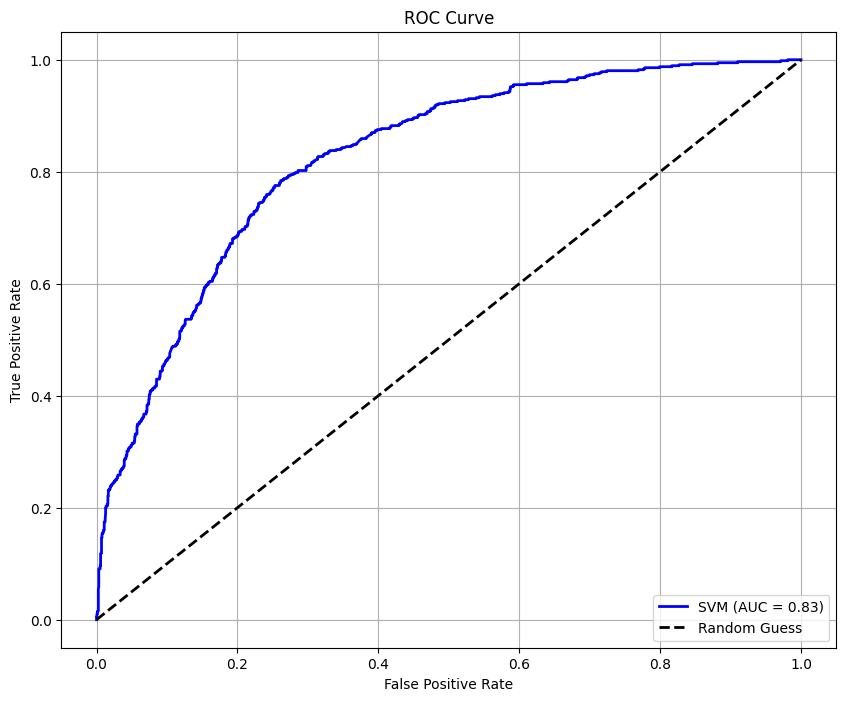

In [ ]:
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##XGBoost

In [ ]:
import optuna

# Function to optimize XGBoost hyperparameters
def xgb_objective(trial):
    print("Starting a new trial for XGBoost hyperparameter tuning...")
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
    gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)

    # Create and train the XGBoost model
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train, y_train)

    # Predict probabilities and evaluate
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # Calculate ROC AUC and F1 score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)

    print(f"Trial complete with ROC AUC={roc_auc}, F1 Score={f1}")

    # Returning F1 score as the primary metric
    return f1

# Create a study and optimize the objective function
print("Creating a study for XGBoost...")
xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(xgb_objective, n_trials=150)

[I 2024-07-30 17:53:42,658] A new study created in memory with name: no-name-f8c48003-02c0-4529-a2dd-5945232f01a3


Creating a study for XGBoost...
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.7953512645154313, F1 Score=0.5339805825242718
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8358477495112137, F1 Score=0.5745526838966204
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8383512334448422, F1 Score=0.5788944723618091
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8341382917390209, F1 Score=0.4782096584216726
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8277981654543385, F1 Score=0.49082568807339444
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8290588258309368, F1 Score=0.560546875
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8260967630200152, F1 Score=0.0

<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature


Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8339386344361089, F1 Score=0.0
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8231421801656867, F1 Score=0.5507537688442211
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8353552231386129, F1 Score=0.0
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8332297647035808, F1 Score=0.5793499043977056
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8257078052771669, F1 Score=0.5786993402450519
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-30 17:53:48,601] Trial 12 finished with value: 0.5786993402450519 and parameters: {'n_estimators': 116, 'max_depth': 20, 'learning_rate': 0.358383409095788, 'gamma': 4.884004251685039, 'subsample': 0.6881308241998694, 'colsample_bytree': 0.6905171448751194}. Best is trial 10 with value: 0.5793499043977056.
<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/op

Trial complete with ROC AUC=0.8350744370757283, F1 Score=0.5786993402450519
Starting a new trial for XGBoost hyperparameter tuning...


[I 2024-07-30 17:53:48,982] Trial 13 finished with value: 0.5561904761904761 and parameters: {'n_estimators': 141, 'max_depth': 16, 'learning_rate': 0.1321068556325734, 'gamma': 0.2507118614242829, 'subsample': 0.5865390403536604, 'colsample_bytree': 0.5156054123015449}. Best is trial 10 with value: 0.5793499043977056.
<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has 

Trial complete with ROC AUC=0.8089642101338452, F1 Score=0.5561904761904761
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8318465481151085, F1 Score=0.5799043062200956
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.7692985757011883, F1 Score=0.5381818181818182
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.830867249182671, F1 Score=0.5664062500000001
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8107369598464422, F1 Score=0.5531100478468899
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8277498334271205, F1 Score=0.0
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8350686832629644, F1 Score=0.5711519845111327
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8165661475576791, F1 Score=0.5654250238777458
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.835761442319753, F1 Score=0.5817825661116552
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:53:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-30 17:53:50,935] Trial 22 finished with value: 0.5836575875486383 and parameters: {'n_estimators': 80, 'max_depth': 7, 'learning_rate': 0.07056837379255097, 'gamma': 0.17689547570473801, 'subsample':

Trial complete with ROC AUC=0.8332004202584843, F1 Score=0.5836575875486383
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8313896953816445, F1 Score=0.5770363101079489
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8376400621872083, F1 Score=0.5793650793650793
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8262785835033585, F1 Score=0.5678294573643411
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8370577763354887, F1 Score=0.5684430512016719
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8224517226340036, F1 Score=0.5738798856053384
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8337878845416915, F1 Score=0.0
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8280639916040364, F1 Score=0.5580487804878049
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8326008729684726, F1 Score=0.5672227674190382
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8366705447364697, F1 Score=0.580259222333001
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8377758521684393, F1 Score=0.5825825825825826
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.838580810574127, F1 Score=0.5805805805805806
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8375278628383098, F1 Score=0.5801980198019802
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8343114815032181, F1 Score=0.09152542372881356
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8380192384483578, F1 Score=0.5740181268882176
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8367603042155884, F1 Score=0.5693581780538303
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.830931691885628, F1 Score=0.5714285714285714
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8375025460621481, F1 Score=0.5688442211055277
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8322809609787927, F1 Score=0.3794037940379404
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8379191221062637, F1 Score=0.5810945273631841
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8269914809048217, F1 Score=0.5813282001924928
Starting a new trial for XGBoost hyperparameter tuning...


[I 2024-07-30 17:54:04,910] Trial 43 finished with value: 0.5754245754245755 and parameters: {'n_estimators': 105, 'max_depth': 3, 'learning_rate': 0.21369748658627177, 'gamma': 3.207326644018628, 'subsample': 0.5801860109367871, 'colsample_bytree': 0.766013955689046}. Best is trial 22 with value: 0.5836575875486383.
<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has be

Trial complete with ROC AUC=0.8374214173021753, F1 Score=0.5754245754245755
Starting a new trial for XGBoost hyperparameter tuning...


[I 2024-07-30 17:54:05,193] Trial 44 finished with value: 0.0 and parameters: {'n_estimators': 128, 'max_depth': 6, 'learning_rate': 0.0005245387043235347, 'gamma': 0.0913745411071433, 'subsample': 0.5311594612236767, 'colsample_bytree': 0.7112946774526363}. Best is trial 22 with value: 0.5836575875486383.
<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecat

Trial complete with ROC AUC=0.8341848976224095, F1 Score=0.0
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8148935141871761, F1 Score=0.5628517823639775
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8374806815736449, F1 Score=0.5757575757575758
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.835501369982819, F1 Score=0.5377969762419006
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.7880744175127649, F1 Score=0.5339622641509435
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.7810271476393833, F1 Score=0.5298988040478382
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8395106267167939, F1 Score=0.584
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.838192428212555, F1 Score=0.5753968253968254
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8310692080106883, F1 Score=0.584795321637427
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8297026774792315, F1 Score=0.5601539942252165
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.838515217108617, F1 Score=0.5844027640671273
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8375387950825615, F1 Score=0.577560975609756
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8374064573889888, F1 Score=0.5353645266594125
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8368702020393815, F1 Score=0.5708622398414271
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8345473878265433, F1 Score=0.5779999999999998
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8330744117589519, F1 Score=0.5728250244379276
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8383339720065501, F1 Score=0.5776892430278885
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8225173160995134, F1 Score=0.5656370656370656
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8319921195780384, F1 Score=0.5786901270772238
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8209252361077068, F1 Score=0.558766859344894
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8338897270276149, F1 Score=0.5714285714285714
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.7747008305053344, F1 Score=0.5303867403314917
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8151530111428338, F1 Score=0.5594671741198858
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8148549636416571, F1 Score=0.5584541062801932
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8320525346120607, F1 Score=0.5761718749999999
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.816890087216294, F1 Score=0.569548872180451
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8330939747223498, F1 Score=0.5450689289501591
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8377545630612125, F1 Score=0.5725725725725725
Starting a new trial for XGBoost hyperparameter tuning...


[I 2024-07-30 17:54:16,876] Trial 72 finished with value: 0.5754245754245755 and parameters: {'n_estimators': 86, 'max_depth': 4, 'learning_rate': 0.06597109788928392, 'gamma': 0.38493404944277076, 'subsample': 0.5887987083297948, 'colsample_bytree': 0.7100826091702943}. Best is trial 52 with value: 0.584795321637427.
<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has b

Trial complete with ROC AUC=0.8387229297493985, F1 Score=0.5754245754245755
Starting a new trial for XGBoost hyperparameter tuning...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:54:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-30 17:54:17,116] Trial 73 finished with value: 0.579624134520277 and parameters: {'n_estimators': 110, 'max_depth': 3, 'learning_rate': 0.1343562087304621, 'gamma': 0.08845206764158868, 'subsample': 0.6067670293134051, 'colsample_bytree': 0.6839644807399275}. Best is trial 52 with value: 0.584795321637427.
<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gith

Trial complete with ROC AUC=0.8372119785175646, F1 Score=0.579624134520277
Starting a new trial for XGBoost hyperparameter tuning...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:54:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-30 17:54:17,388] Trial 74 finished with value: 0.5722488038277512 and parameters: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.17147522391071943, 'gamma': 0.9045733432022678, 'subsample': 0.6129086059132507, 'colsample_bytree': 0.7257745812399867}. Best is trial 52 with value: 0.584795321637427.


Trial complete with ROC AUC=0.8226496537930861, F1 Score=0.5722488038277512
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8367844702291974, F1 Score=0.5784797630799605
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8355663880670526, F1 Score=0.5691382765531062
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8360002255494605, F1 Score=0.556910569105691
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:54:18] WARNING: /workspace/src/learner.cc:740: 


Trial complete with ROC AUC=0.820482767906153, F1 Score=0.0
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8371446589082256, F1 Score=0.5714285714285714
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8322648503030534, F1 Score=0.5677031093279841
Starting a new trial for XGBoost hyperparameter tuning...


[I 2024-07-30 17:54:18,878] Trial 81 finished with value: 0.5900681596884129 and parameters: {'n_estimators': 87, 'max_depth': 4, 'learning_rate': 0.08635383018432927, 'gamma': 0.3254550131310419, 'subsample': 0.6095698971666423, 'colsample_bytree': 0.8158331490392031}. Best is trial 81 with value: 0.5900681596884129.
<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has b

Trial complete with ROC AUC=0.8378615839786234, F1 Score=0.5900681596884129
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8383598641639882, F1 Score=0.5742771684945165
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8349150564621647, F1 Score=0.5881207400194742
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8139383812683474, F1 Score=0.5603864734299517
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8277659441028599, F1 Score=0.5755813953488371
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.830010506462107, F1 Score=0.28994082840236685
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8321382664222448, F1 Score=0.5675413022351797
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8351964179063256, F1 Score=0.576303317535545
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8360963142226197, F1 Score=0.593103448275862
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8369490292742486, F1 Score=0.562564632885212
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8396987763941776, F1 Score=0.5845845845845846
Starting a new trial for XGBoost hyperparameter tuning...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:54:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-30 17:54:21,088] Trial 92 finished with value: 0.5757271815446339 and parameters: {'n_estimators': 99, 'max_depth': 5, 'learning_rate': 0.0591911523306066, 'gamma': 0.5404807489923614, 'subsample': 0.5622301341467549, 'colsample_bytree': 0.761424548197462}. Best is trial 89 with value: 0.593103448275862.
<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

Trial complete with ROC AUC=0.8368598451764061, F1 Score=0.5757271815446339
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:54:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-30 17:54:21,868] Trial 93 finished with value: 0.5684007707129094 and parameters: {'n_estimators': 205, 'max_depth': 6, 'learning_rate': 0.0830809459740936, 'gamma': 0.9670423655803352, 'subsample': 

Trial complete with ROC AUC=0.8269097767635722, F1 Score=0.5684007707129094
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8380065800602771, F1 Score=0.5825825825825826
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.839290831069208, F1 Score=0.5839126117179743
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8171610917974796, F1 Score=0.5599232981783316
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8334311481503218, F1 Score=0.5448785638859557
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8362315288225743, F1 Score=0.5683168316831684
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.837428321877492, F1 Score=0.5776458951533135
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.810140864844089, F1 Score=0.5571565802113353
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8392637881492171, F1 Score=0.57429718875502
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8384714881316104, F1 Score=0.5720040281973816
Starting a new trial for XGBoost hyperparameter tuning...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:54:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-30 17:54:26,639] Trial 103 finished with value: 0.5610766045548654 and parameters: {'n_estimators': 102, 'max_depth': 4, 'learning_rate': 0.025886913093886865, 'gamma': 0.3675361458685063, 'subsample': 0.5677925203800257, 'colsample_bytree': 0.7784145558384958}. Best is trial 89 with value: 0.593103448275862.


Trial complete with ROC AUC=0.8359823887298918, F1 Score=0.5610766045548654
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8251410547199102, F1 Score=0.5739130434782608
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8392775972998507, F1 Score=0.5760000000000001
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8384962295264957, F1 Score=0.5705521472392637
Starting a new trial for XGBoost hyperparameter tuning...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:54:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-30 17:54:27,628] Trial 107 finished with value: 0.5744888023369037 and parameters: {'n_estimators': 89, 'max_depth': 4, 'learning_rate': 0.14077015656201092, 'gamma': 0.5430576527907028, 'subsample': 0.6217416080830591, 'colsample_bytree': 0.8864547157710534}. Best is trial 89 with value: 0.593103448275862.
<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

Trial complete with ROC AUC=0.8311319245698162, F1 Score=0.5744888023369037
Starting a new trial for XGBoost hyperparameter tuning...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:54:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-30 17:54:27,959] Trial 108 finished with value: 0.5694849368318756 and parameters: {'n_estimators': 126, 'max_depth': 5, 'learning_rate': 0.08999844885997163, 'gamma': 0.11167648682959552, 'subsample': 0.6327259202946033, 'colsample_bytree': 0.7391784436422406}. Best is trial 89 with value: 0.593103448275862.


Trial complete with ROC AUC=0.8343011246402428, F1 Score=0.5694849368318756
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8108733252089497, F1 Score=0.553875236294896
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8399087905600645, F1 Score=0.5878848063555114


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:54:28] WARNING: /workspace/src/learner.cc:740: 


Trial complete with ROC AUC=0.840069321936181, F1 Score=0.5882352941176471
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8396527458920654, F1 Score=0.5870646766169154
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8391987700649837, F1 Score=0.5863770977295163
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8398961321719838, F1 Score=0.5796812749003983
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8364202538812344, F1 Score=0.5676229508196722
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8383736733146219, F1 Score=0.5816023738872403
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8406671430823636, F1 Score=0.5822532402791626
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8391435334624489, F1 Score=0.5877712031558185
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8391838101517972, F1 Score=0.5861386138613861
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8395877278078319, F1 Score=0.5728542914171656
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8393403138589786, F1 Score=0.5883514313919053
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8389012979450834, F1 Score=0.58300395256917
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8378863253735088, F1 Score=0.5757271815446339
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8395969339082543, F1 Score=0.5810945273631841
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.836496779590996, F1 Score=0.5618661257606491
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8279822874627871, F1 Score=0.0
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8387148744115287, F1 Score=0.5837512537612838
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8392643635304935, F1 Score=0.5676767676767677
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8382775846414627, F1 Score=0.5817825661116552
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8397741513413863, F1 Score=0.5782652043868395
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8380537613249419, F1 Score=0.5880077369439072
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8375894286348851, F1 Score=0.5781710914454277
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8381889759248966, F1 Score=0.5782652043868395
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8400313467719385, F1 Score=0.5796812749003983
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8394772546027625, F1 Score=0.5814889336016097
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8354300227045452, F1 Score=0.5624365482233503
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8362338303476801, F1 Score=0.564366632337796
Starting a new trial for XGBoost hyperparameter tuning...
Trial complete with ROC AUC=0.8387142990302523, F1 Score=0.5837414299706171
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8277279689386172, F1 Score=0.5684007707129094
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.83742544497111, F1 Score=0.5850746268656716
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8370997791686661, F1 Score=0.5856573705179282
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.836816691580676, F1 Score=0.5825049701789264
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8384300606797095, F1 Score=0.5867195242814667
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.834696986958408, F1 Score=0.5770363101079489
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.832767158157353, F1 Score=0.5780795344325896
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8389375469654968, F1 Score=0.5774647887323944
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8355266867589808, F1 Score=0.5877712031558185
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8328131886594653, F1 Score=0.5176211453744494
Starting a new trial for XGBoost hyperparameter tuning...


<ipython-input-53-cd1d1b3069e7>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1.0)
<ipython-input-53-cd1d1b3069e7>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e1)
<ipython-input-53-cd1d1b3069e7>:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
<ipython-input-53-cd1d1b3069e7>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature

Trial complete with ROC AUC=0.8320042025848429, F1 Score=0.5765054294175717


In [ ]:
# Output best parameters
best_xgb_params = xgb_study.best_params
print("Best parameters for XGBoost:", best_xgb_params)
print(f"Best trial F1 Score: {xgb_study.best_value}")

Best parameters for XGBoost: {'n_estimators': 102, 'max_depth': 5, 'learning_rate': 0.07086707088913606, 'gamma': 0.58354582111446, 'subsample': 0.5613603874775857, 'colsample_bytree': 0.7785024993669967}
Best trial F1 Score: 0.593103448275862


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:54:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best model ROC AUC: 0.84
Best model F1 Score: 0.59


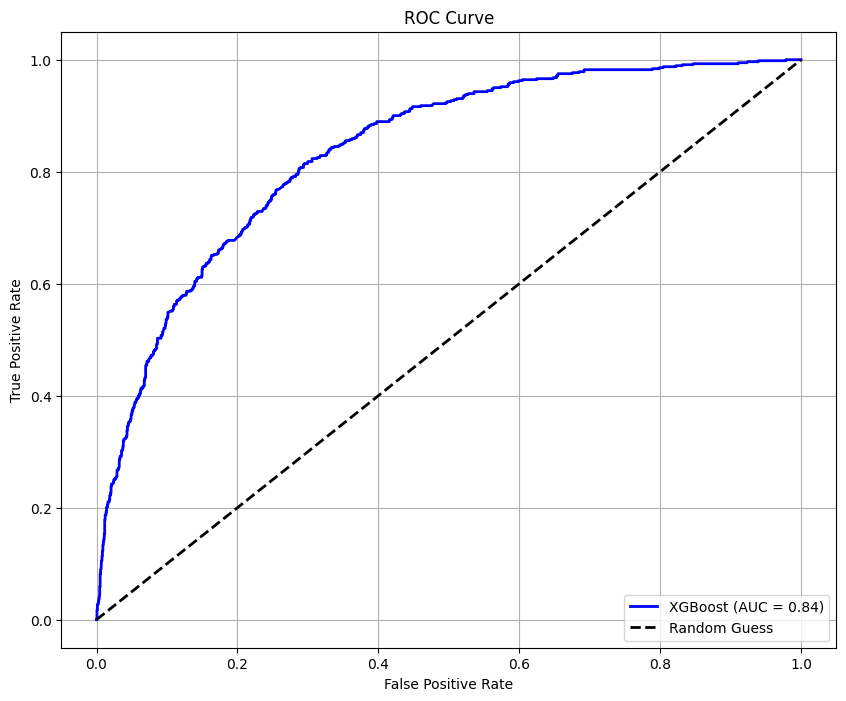

In [ ]:
# Retrain the XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(
    n_estimators=best_xgb_params['n_estimators'],
    max_depth=best_xgb_params['max_depth'],
    learning_rate=best_xgb_params['learning_rate'],
    gamma=best_xgb_params['gamma'],
    subsample=best_xgb_params['subsample'],
    colsample_bytree=best_xgb_params['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
best_xgb_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred_best = best_xgb_model.predict(X_test)
y_pred_proba_best = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_best)
print(f"Best model ROC AUC: {roc_auc:.2f}")

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_best)
print(f"Best model F1 Score: {f1:.2f}")

# Plotting the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
